# Ensemble learning

The goal of this project is to use ensamble learning to predict employees' satisfaction levels based on different factors. For this purpose, we will use different classifiers from sklearn and then combine them with different ensemble models.

Dataset: Employee Satisfaction Survey Data from Kaggle

In [1]:
!pip install kaggle

In [49]:
!kaggle datasets download redpen12/employees-satisfaction-analysis


Dataset URL: https://www.kaggle.com/datasets/redpen12/employees-satisfaction-analysis
License(s): apache-2.0
100% 140k/140k [00:00<00:00, 646kB/s]
100% 140k/140k [00:00<00:00, 645kB/s]


In [50]:
import zipfile

with zipfile.ZipFile("employees-satisfaction-analysis.zip", "r") as zip_ref:
    zip_ref.extractall()



In [51]:
import pandas as pd
data = pd.read_csv("Employee Attrition.csv")  # Replace with actual CSV name
print(data)


        Emp ID  satisfaction_level  last_evaluation  number_project  \
0          1.0                0.38             0.53             2.0   
1          2.0                0.80             0.86             5.0   
2          3.0                0.11             0.88             7.0   
3          4.0                0.72             0.87             5.0   
4          5.0                0.37             0.52             2.0   
...        ...                 ...              ...             ...   
15782  14995.0                0.40             0.57             2.0   
15783  14996.0                0.37             0.48             2.0   
15784  14997.0                0.37             0.53             2.0   
15785  14998.0                0.11             0.96             6.0   
15786  14999.0                0.37             0.52             2.0   

       average_montly_hours  time_spend_company  Work_accident  \
0                     157.0                 3.0            0.0   
1              

In [52]:
# We see the column names
data.columns.unique()

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

Preliminary visual analysis

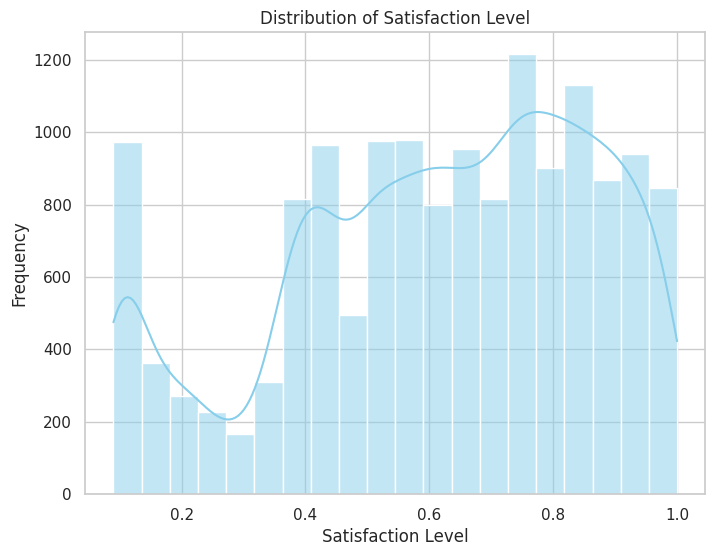

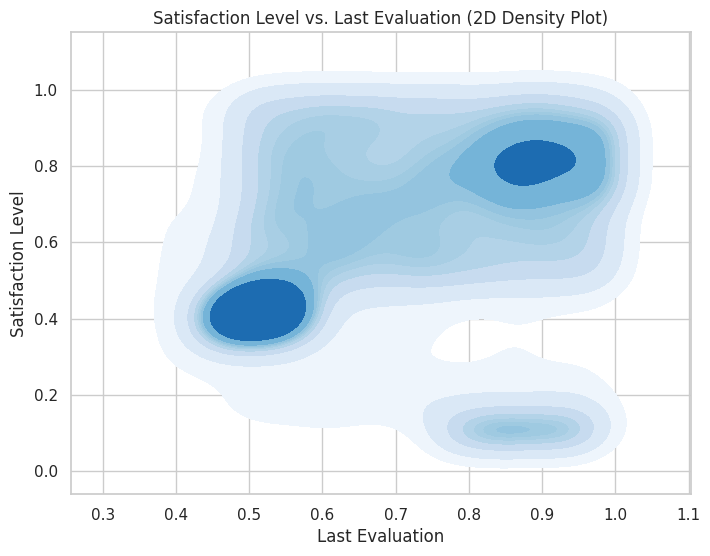

<ipython-input-62-e9a0143bccb5>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='number_project', y='satisfaction_level', palette='viridis')


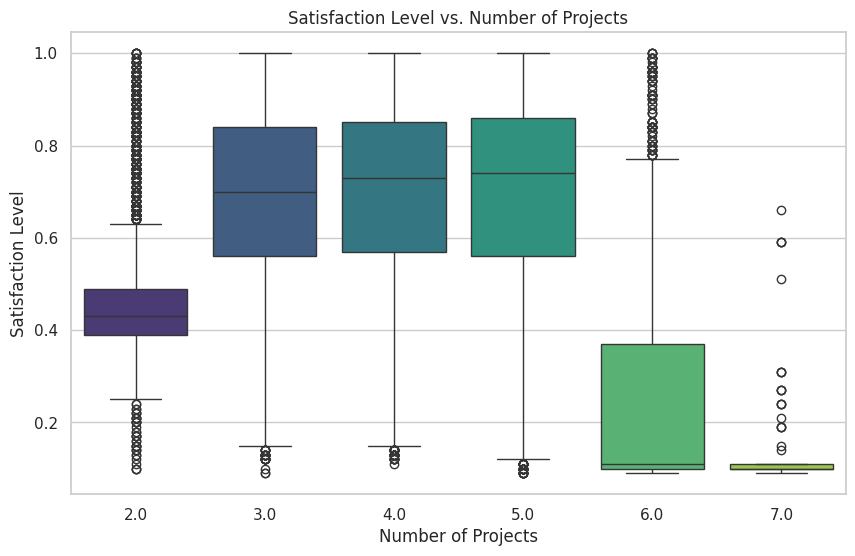

<ipython-input-62-e9a0143bccb5>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='dept', y='satisfaction_level', palette='Set2')


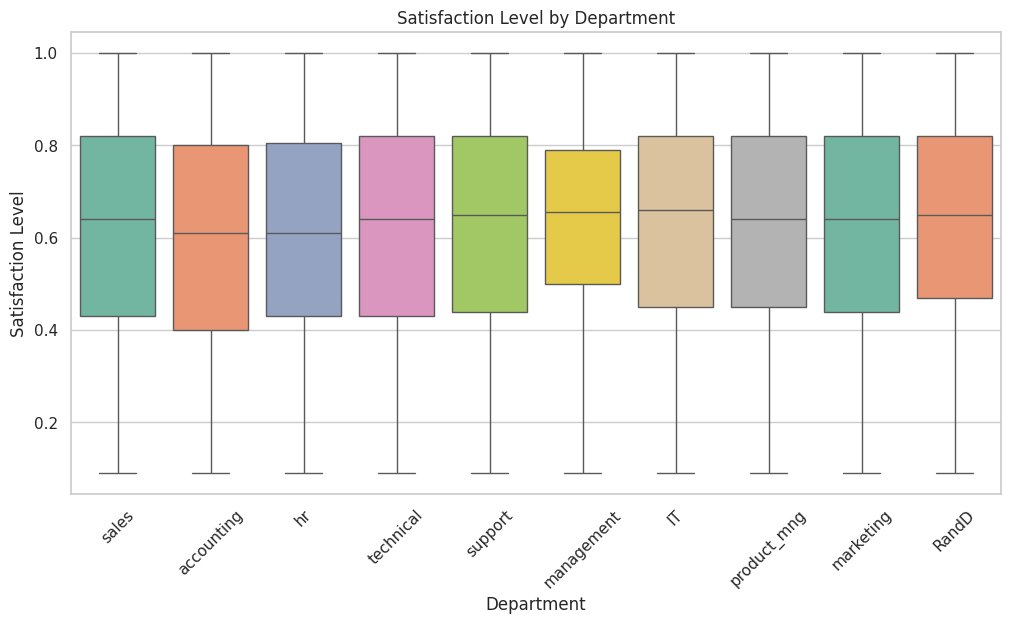

<ipython-input-62-e9a0143bccb5>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='salary', y='satisfaction_level', palette='muted')


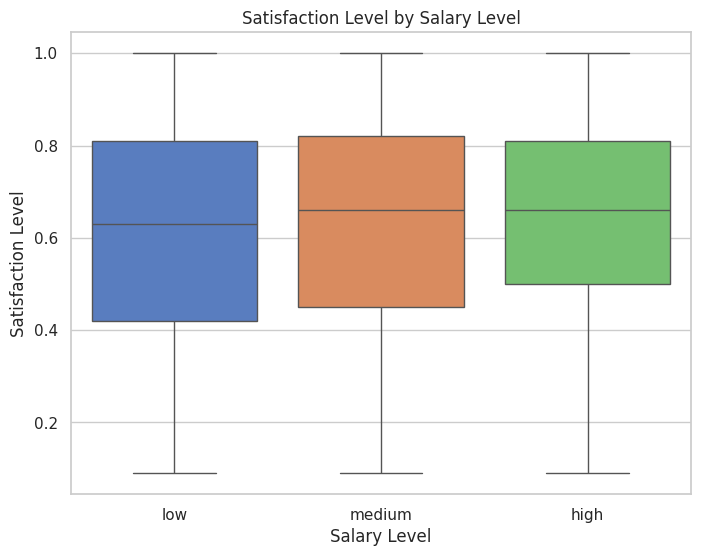

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")

# We plot the distribution of satisfaction level to see how the sample distribution is
plt.figure(figsize=(8, 6))
sns.histplot(data['satisfaction_level'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Frequency")
plt.show()

# We study the relation between the last evaluation and the satisfaction level through a density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='last_evaluation', y='satisfaction_level', cmap='Blues', fill=True)
plt.xlabel("Last Evaluation")
plt.ylabel("Satisfaction Level")
plt.title("Satisfaction Level vs. Last Evaluation (2D Density Plot)")
plt.show()

# We see if there is a relation between number of projects and satisfaction level. One would think that the most satisfied employees are the ones that have a reasonable nmb of projects (not too many or too less)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='number_project', y='satisfaction_level', palette='viridis')
plt.title("Satisfaction Level vs. Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Satisfaction Level")
plt.show()

# We see if there is a relation between the department and the satisfaction level.
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='dept', y='satisfaction_level', palette='Set2')
plt.title("Satisfaction Level by Department")
plt.xlabel("Department")
plt.ylabel("Satisfaction Level")
plt.xticks(rotation=45)
plt.show()

# Finally, we see if there is a relation between the salary and satisfaction level. One may think that a higher salary means a higher satisfaction level.
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='salary', y='satisfaction_level', palette='muted')
plt.title("Satisfaction Level by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Satisfaction Level")
plt.show()



Ensemble learning models

Individual models

In [91]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# To determine the satisfaction levels, we will consider that employees with satisfaction_level > 0.5 are 'satisfied' (1), and others as 'not satisfied' (0)
data['satisfied'] = (data['satisfaction_level'] > 0.5).astype(int)
# The target value will be the 'satisfied' variable, that varies between 0 and 1
y = data['satisfied']

# The features are the remaining columns, without the employee ID
X = data.drop(columns=['satisfaction_level', 'Emp ID', 'satisfied'])
# We drop NAN values
X = X.dropna()
y = y[X.index]
# One-hot encode categorical variables (creating binary columns for each categorical column)
X = pd.get_dummies(X, drop_first=True)

# We define training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

# We select individual classifiers, in this case logistic regression, random forest classifier and SVC
log_clf = LogisticRegression(max_iter=1000, random_state=9)
rnd_clf = RandomForestClassifier(random_state=9)
svm_clf = SVC(random_state=9)

# Train and evaluate each model individually
print("Individual Classifier Performance:")

# Support Vector Classifier
svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"SVM accuracy: {accuracy_score(y_test, svm_y_predict):.2f}")

# Logistic Regression Classifier
log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"Logistic Regression accuracy: {accuracy_score(y_test, log_y_predict):.2f}")

# Random Forest Classifier
rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"Random Forest accuracy: {accuracy_score(y_test, rnd_y_predict):.2f}")




Individual Classifier Performance:
SVM accuracy: 0.70
Logistic Regression accuracy: 0.68
Random Forest accuracy: 0.87


Ensemble model: Voting Classifier

In [93]:
# We initialize the voting classifier ensemble model
voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svm", svm_clf)],
    voting="hard"
)
# We train and evaluate the Voting Classifier
print("\nVoting Classifier Performance:")
voting_clf.fit(X_train, y_train)
voting_y_predict = voting_clf.predict(X_test)
print(classification_report(y_test, voting_y_predict), "\n")


Voting Classifier Performance:
              precision    recall  f1-score   support

           0       0.80      0.20      0.31      1928
           1       0.72      0.98      0.83      4072

    accuracy                           0.73      6000
   macro avg       0.76      0.59      0.57      6000
weighted avg       0.75      0.73      0.66      6000
 



We can see that the voting ensemble model has a higher accuracy than the individual models SVC and Logistic Regression. However, the Random Forest model has the highest accuracy.

Ensemble model: Decision Tree Classifiers




In [94]:
# We import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 6)
# First we build a stump tree with a max depth of 1
stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")

# Then we build a deeper tree, with a max depth of 6
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.76      0.39      0.52      1926
           1       0.77      0.94      0.85      4074

    accuracy                           0.77      6000
   macro avg       0.77      0.67      0.68      6000
weighted avg       0.77      0.77      0.74      6000
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.88      0.61      0.72      1926
           1       0.84      0.96      0.90      4074

    accuracy                           0.85      6000
   macro avg       0.86      0.79      0.81      6000
weighted avg       0.85      0.85      0.84      6000
 



We can see that both models achieved very good accuracy levels, of 77% and 85% respectively. We see that increasing the depth helped to achieve a higher accuracy. However, the Random Forest model is the one that obtained the highest accuracy.